# Libraries Import

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Retrive to drive

In [2]:
from google.colab import drive
drive.mount('content/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at content/


# Data Preprocessing

In [3]:
df = pd.read_csv("/content/content/My Drive/Threat Data/paloalto.csv")

In [4]:
# Show top 5 rows
df.head()

,Domain,Receive Time,Serial #,Type,Threat/Content Type,Config Version,Generate Time,Source address,Destination address,NAT Source IP,NAT Destination IP,Rule,Source User,Destination User,Application,Virtual System,Source Zone,Destination Zone,Inbound Interface,Outbound Interface,Log Action,Time Logged,Session ID,Repeat Count,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Flags,IP Protocol,Action,URL/Filename,Threat/Content Name,Category,Severity,Direction,Sequence Number,Action Flags,Source Country,Destination Country,cpadding,contenttype,pcap_id,filedigest,cloud,url_idx,user_agent,filetype,xff,referer,sender,subject,recipient,reportid,DG Hierarchy Level 1,DG Hierarchy Level 2,DG Hierarchy Level 3,DG Hierarchy Level 4,Virtual System Name,Device Name,file_url,Source VM UUID,Destination VM UUID,http_method,Tunnel ID/IMSI,Monitor Tag/IMEI,Parent Session ID,Parent Session Start Time,Tunnel,thr_category,contentver,sig_flags,SCTP Association ID,Payload Protocol ID,http_headers,URL Category List,UUID for rule,HTTP/2 Connection,dynusergroup_name
0,1,2020-05-29 05:12:12.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216806,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:12:12.000,405508,1,58603,80,58603,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,client-to-server,761214,0x0,United States,172.16.0.0-172.31.255.255,0,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,ADC-FW,Abbott-ADC-FW,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,sql-injection,AppThreat-8277-6107,0x0,0,4294967295,NaN,NaN,NaN,NaN,NaN
1,1,2020-05-29 05:12:06.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216736,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:12:06.000,381204,3,58458,80,58458,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,client-to-server,761213,0x0,United States,172.16.0.0-172.31.255.255,0,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,ADC-FW,Abbott-ADC-FW,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,sql-injection,AppThreat-8277-6107,0x0,0,4294967295,NaN,NaN,NaN,NaN,NaN
2,1,2020-05-29 05:11:59.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216655,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:11:59.000,406647,3,58321,80,58321,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,client-to-server,761212,0x0,United States,172.16.0.0-172.31.255.255,0,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,ADC-FW,Abbott-ADC-FW,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,sql-injection,AppThreat-8277-6107,0x0,0,4294967295,NaN,NaN,NaN,NaN,NaN
3,1,2020-05-29 05:11:53.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216586,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:11:53.000,365390,3,58176,80,58176,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,client-to-server,761211,0x0,United States,172.16.0.0-172.31.255.255,0,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,ADC-FW,Abbott-ADC-FW,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,sql-injection,AppThreat-8277-6107,0x0,0,4294967295,NaN,NaN,NaN,NaN,NaN
4,1,2020-05-29 05:11:47.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216516,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:11:47.000,390193,1,58042,80,58042,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-a

In [5]:
#Show total coloumns
df.columns

Index(['Domain', 'Receive Time', 'Serial #', 'Type', 'Threat/Content Type',
       'Config Version', 'Generate Time', 'Source address',
       'Destination address', 'NAT Source IP', 'NAT Destination IP', 'Rule',
       'Source User', 'Destination User', 'Application', 'Virtual System',
       'Source Zone', 'Destination Zone', 'Inbound Interface',
       'Outbound Interface', 'Log Action', 'Time Logged', 'Session ID',
       'Repeat Count', 'Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Flags', 'IP Protocol', 'Action',
       'URL/Filename', 'Threat/Content Name', 'Category', 'Severity',
       'Direction', 'Sequence Number', 'Action Flags', 'Source Country',
       'Destination Country', 'cpadding', 'contenttype', 'pcap_id',
       'filedigest', 'cloud', 'url_idx', 'user_agent', 'filetype', 'xff',
       'referer', 'sender', 'subject', 'recipient', 'reportid',
       'DG Hierarchy Level 1', 'DG Hierarchy Level 2', 'DG Hierarchy Level 3',
       

In [6]:
# Show Information Null_Values etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91819 entries, 0 to 91818
Data columns (total 79 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Domain                     91819 non-null  int64  
 1   Receive Time               91819 non-null  object 
 2   Serial #                   91819 non-null  object 
 3   Type                       91819 non-null  object 
 4   Threat/Content Type        91819 non-null  object 
 5   Config Version             91819 non-null  int64  
 6   Generate Time              91819 non-null  float64
 7   Source address             91819 non-null  object 
 8   Destination address        91819 non-null  object 
 9   NAT Source IP              89330 non-null  object 
 10  NAT Destination IP         89330 non-null  object 
 11  Rule                       89331 non-null  object 
 12  Source User                0 non-null      float64
 13  Destination User           0 non-null      flo

# Drop Null Columns 

In [7]:
drop_list =["Source User",
"Destination User",
"contenttype",
"filedigest",
"cloud",
"user_agent",
"filetype",
"xff",
"referer",
"sender",
"subject",
"recipient",
"file_url",
"Source VM UUID",
"Destination VM UUID",
"http_method",
"Monitor Tag/IMEI",
"Parent Session Start Time",
"Tunnel",
"http_headers",
"URL Category List",
"dynusergroup_name"]

In [8]:
df_without_na = df.drop(axis=1,columns=drop_list)

In [9]:
df_without_na.shape, df.shape

((91819, 57), (91819, 79))

In [10]:
df_without_na.columns

Index(['Domain', 'Receive Time', 'Serial #', 'Type', 'Threat/Content Type',
       'Config Version', 'Generate Time', 'Source address',
       'Destination address', 'NAT Source IP', 'NAT Destination IP', 'Rule',
       'Application', 'Virtual System', 'Source Zone', 'Destination Zone',
       'Inbound Interface', 'Outbound Interface', 'Log Action', 'Time Logged',
       'Session ID', 'Repeat Count', 'Source Port', 'Destination Port',
       'NAT Source Port', 'NAT Destination Port', 'Flags', 'IP Protocol',
       'Action', 'URL/Filename', 'Threat/Content Name', 'Category', 'Severity',
       'Direction', 'Sequence Number', 'Action Flags', 'Source Country',
       'Destination Country', 'cpadding', 'pcap_id', 'url_idx', 'reportid',
       'DG Hierarchy Level 1', 'DG Hierarchy Level 2', 'DG Hierarchy Level 3',
       'DG Hierarchy Level 4', 'Virtual System Name', 'Device Name',
       'Tunnel ID/IMSI', 'Parent Session ID', 'thr_category', 'contentver',
       'sig_flags', 'SCTP Associat

# Drop Un Necessary Columns 

In [11]:
# make a list of un necessary columns
updated_list = []
lists = ["Threat/Content Type","Rule","Source Zone","Destination Zone","Action","Threat/Content Name","Category","Severity","Source Country","Device Name","thr_category"]

for i in df_without_na.columns:
  if i not in lists:
    updated_list.append(i)



In [12]:
# Check lenght of updated_list
len(updated_list)

46

In [13]:
# Drop Un necessary columns
df_update = df_without_na.drop(axis=1,columns=updated_list)

In [14]:
# Show top 5 updated columns
df_update.head()

,Threat/Content Type,Rule,Source Zone,Destination Zone,Action,Threat/Content Name,Category,Severity,Source Country,Device Name,thr_category
0,vulnerability,O2I_Prod_Server_Access,Internet_Zone,Prod_Zone,alert,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,United States,Abbott-ADC-FW,sql-injection
1,vulnerability,O2I_Prod_Server_Access,Internet_Zone,Prod_Zone,alert,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,United States,Abbott-ADC-FW,sql-injection
2,vulnerability,O2I_Prod_Server_Access,Internet_Zone,Prod_Zone,alert,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,United States,Abbott-ADC-FW,sql-injection
3,vulnerability,O2I_Prod_Server_Access,Internet_Zone,Prod_Zone,alert,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,United States,Abbott-ADC-FW,sql-injection
4,vulnerability,O2I_Prod_Server_Access,Internet_Zone,Prod_Zone,alert,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,United States,Abbott-ADC-FW,sql-injection


# Data Analysis / Insights
In this data set we take 2 variables
1. Action
2. Country

# Threat/Content Type vs Action

 **Threet/Content Type**
 have 5 types of unique Variable 


1.   vulnerability
2.   spyware
3.  packet
4.  scan
5.  flood

**Action**
 have 4 types of unique Variable 

1.   alert
2.   reset-both
3.  reset-server
4. Random-drop

## 1. Vulerability vs Action

In [15]:
# Reterive the data from dataset to check whether data is equal to vulanrity or not
vulanbrity_action = df_update[df_update["Threat/Content Type"]=="vulnerability"]

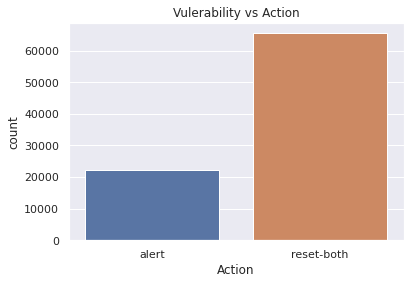

In [16]:
# Make Count Plot

sns.set(style="darkgrid")
plt.title("Vulerability vs Action")
ax = sns.countplot(x="Action", data=vulanbrity_action)

## 2. spyware vs Action

In [17]:
# Reterive the data from dataset to check whether data is equal to spyware or not
spyware_action = df_update[df_update["Threat/Content Type"]=="spyware"]

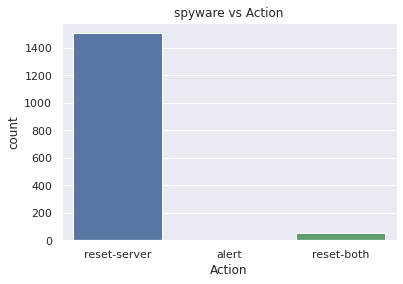

In [18]:
# Make count plot

sns.set(style="darkgrid")
plt.title("spyware vs Action")
ax = sns.countplot(x="Action", data=spyware_action)

## 3. packet vs Action

In [19]:
# Reterive the data from dataset to check whether data is equal to packet or not

packet_action = df_update[df_update["Threat/Content Type"]=="packet"]

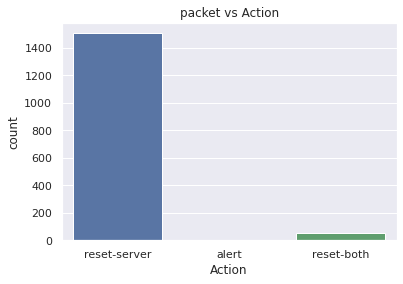

In [20]:
# Make Count Plot

sns.set(style="darkgrid")
plt.title("packet vs Action")
ax = sns.countplot(x="Action", data=spyware_action)

## 4. scan vs Action

In [21]:
# Reterive the data from dataset to check whether data is equal to scan or not

scan_action = df_update[df_update["Threat/Content Type"]=="scan"]

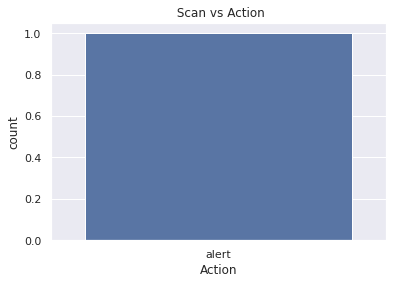

In [22]:
# make count plot


sns.set(style="darkgrid")
plt.title(" Scan vs Action")
ax = sns.countplot(x="Action", data=scan_action)

## 5. flood vs Action

In [23]:
# Reterive the data from dataset to check whether data is equal to flood or not

flood_action = df_update[df_update["Threat/Content Type"]=="flood"]

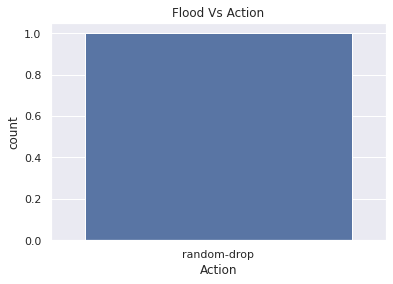

In [24]:
#Make Count plot


sns.set(style="darkgrid")
plt.title("Flood Vs Action")
ax = sns.countplot(x="Action", data=flood_action)

# Threat/Content Type vs Source Country


 **Threet/Content Type**
 have 5 types of unique Variable 


1.   vulnerability
2.   spyware
3.  packet
4.  scan
5.  flood

**Source Country**
 have multiple types of but i select top 10 countries 

1. United States
2. India
3. France
4. Japan
5. China
6. Pakistan
7. Australia
8. Germany
9. United Kingdom
10. United Arab Emirates




## 1. United States vs Threat/Content Type

In [25]:
# Reterive the data from dataset to check whether data is equal to United States or not

us_threat = df_update[df_update["Source Country"]=="United States"]

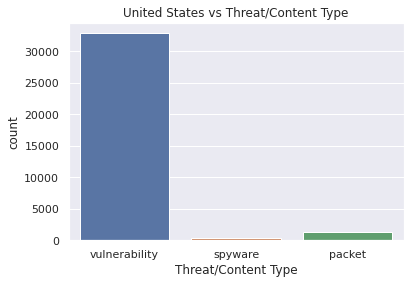

In [26]:
#Make Count Plot

sns.set(style="darkgrid")
plt.title("United States vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=us_threat)


## 2. India vs Threat/Content Type

In [27]:
# Reterive the data from dataset to check whether data is equal to india or not


india_threat = df_update[df_update["Source Country"]=="India"]

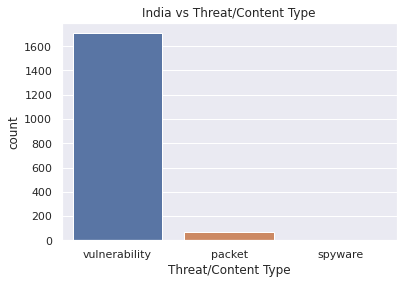

In [28]:
#Make Count plot

sns.set(style="darkgrid")
plt.title("India vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=india_threat)


## 3. France vs Threat/Content Type

In [29]:
# Reterive the data from dataset to check whether data is equal to France or not


france_threat = df_update[df_update["Source Country"]=="France"]

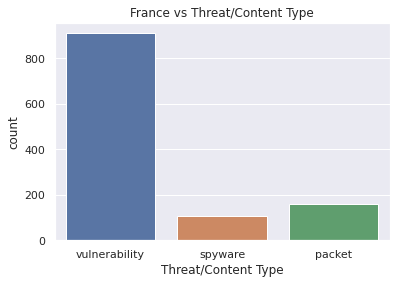

In [30]:
#Make Count Plot

sns.set(style="darkgrid")
plt.title("France vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=france_threat)


## 4. Japan vs Threat/Content Type

In [31]:
# Reterive the data from dataset to check whether data is equal to Japan or not


japan_threat = df_update[df_update["Source Country"]=="Japan"]

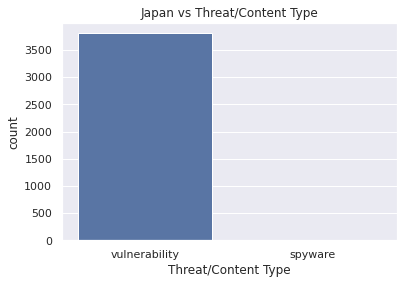

In [32]:
#Make Count Plot

sns.set(style="darkgrid")
plt.title("Japan vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=japan_threat)


## 5. China vs Threat/Content Type

In [33]:
# Reterive the data from dataset to check whether data is equal to China or not


china_threat = df_update[df_update["Source Country"]=="China"]

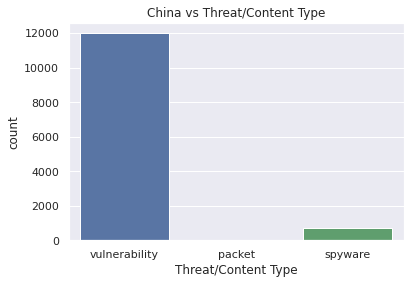

In [34]:
#Make Count Plot

sns.set(style="darkgrid")
plt.title("China vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=china_threat)


## 6. Pakistan vs Threat/Content Type

In [35]:
# Reterive the data from dataset to check whether data is equal to Pakistan or not

paki_threat = df_update[df_update["Source Country"]=="Pakistan"]

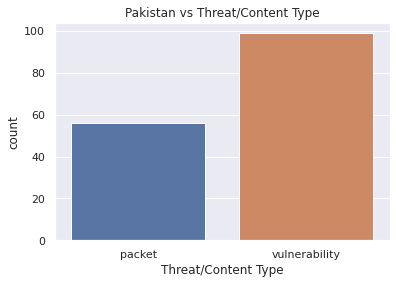

In [36]:
#Make count plot

sns.set(style="darkgrid")
plt.title("Pakistan vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=paki_threat)


## 7. Australia vs Threat/Content Type

In [37]:
# Reterive the data from dataset to check whether data is equal to Australia or not


aust_threat = df_update[df_update["Source Country"]=="Australia"]

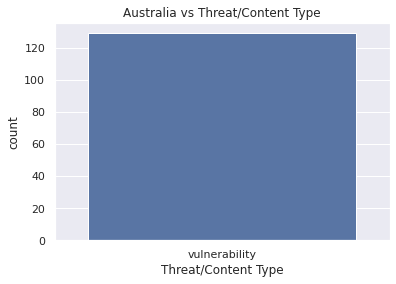

In [38]:
#Make Count plot

sns.set(style="darkgrid")
plt.title("Australia vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=aust_threat)


## 8. Germany vs Threat/Content Type

In [39]:
# Reterive the data from dataset to check whether data is equal to Germany or not

german_threat = df_update[df_update["Source Country"]=="Germany"]

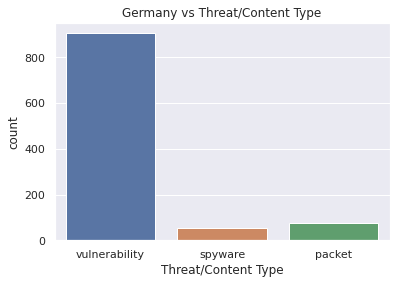

In [40]:
#Make Count plot

sns.set(style="darkgrid")
plt.title("Germany vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=german_threat)


## 9. United Kingdom vs Threat/Content Type

In [41]:
# Reterive the data from dataset to check whether data is equal to Uk or not

uk_threat = df_update[df_update["Source Country"]=="United Kingdom"]

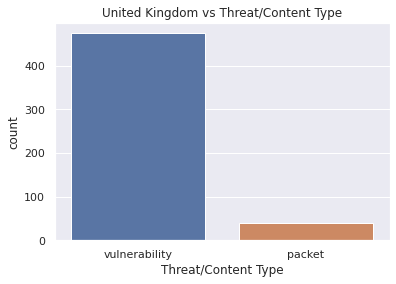

In [42]:
#Make Count Plot

sns.set(style="darkgrid")
plt.title("United Kingdom vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=uk_threat)


## 10. United Arab Emirates vs Threat/Content Type

In [43]:
# Reterive the data from dataset to check whether data is equal to UAE or not

uae_threat = df_update[df_update["Source Country"]=="United Arab Emirates"]

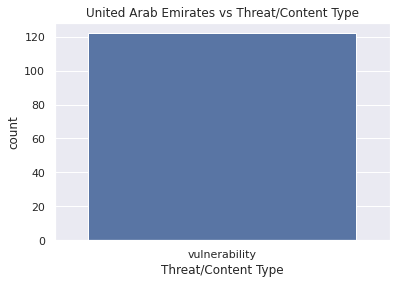

In [44]:
#Count Plot

sns.set(style="darkgrid")
plt.title("United Arab Emirates vs Threat/Content Type")
ax = sns.countplot(x="Threat/Content Type", data=uae_threat)


# Nginx_Log Dataset

In [45]:
n_Data = pd.read_csv("/content/content/My Drive/Threat Data/nginx_logs.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
n_Data.head()

,Host,Date,Page/File,URL parameter,Bandwidth,Response Code,Request Method,Referrers,User Agent,User,Virtual Domain,Cookie
0,172.1.5.56 (United States),2020-06-11 10:00:33.000,/,NaN,NaN,200 - OK,HEAD,No Referrer,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN,NaN,NaN
1,172.1.5.56 (United States),2020-06-11 10:01:53.000,/banner/ajax/load/,requesting_page_url=https%3A%2F%2Ffreestylelib...,94,200 - OK,GET,https://freestylelibre.com.sg/freestyle-libre-...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; ...,NaN,NaN,NaN
2,172.1.6.5 (United States),2020-06-11 10:02:21.000,/products/freestyle-libre-sensor.html,NaN,32.81 KB,200 - OK,GET,No Referrer,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4...,NaN,NaN,NaN
3,172.1.5.56 (United States),2020-06-11 10:02:54.000,/,NaN,NaN,200 - OK,HEAD,No Referrer,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN,NaN,NaN
4,172.1.6.5 (United States),2020-06-11 10:03:45.000,/,NaN,NaN,200 - OK,HEAD,No Referrer,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,NaN,NaN,NaN


## Unqiue User Agent

In [61]:
n_Data.sort_values("User Agent", inplace = True)

In [62]:
n_Data.drop_duplicates(subset ="User Agent", 
                     keep = False, inplace = True)

## Respond = 200- Ok or Method = PUT

In [67]:
n_Data_update = n_Data[(n_Data["Response Code"]!="200 - OK") | (n_Data["Request Method"]=="PUT")]

# Compare Time Column With Nginx_Log and Paloalto

In [132]:
df.head()

,Domain,Receive Time,Serial #,Type,Threat/Content Type,Config Version,Generate Time,Source address,Destination address,NAT Source IP,NAT Destination IP,Rule,Source User,Destination User,Application,Virtual System,Source Zone,Destination Zone,Inbound Interface,Outbound Interface,Log Action,Time Logged,Session ID,Repeat Count,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Flags,IP Protocol,Action,URL/Filename,Threat/Content Name,Category,Severity,Direction,Sequence Number,Action Flags,Source Country,Destination Country,cpadding,contenttype,pcap_id,filedigest,cloud,url_idx,user_agent,filetype,xff,referer,sender,subject,recipient,reportid,DG Hierarchy Level 1,DG Hierarchy Level 2,DG Hierarchy Level 3,DG Hierarchy Level 4,Virtual System Name,Device Name,file_url,Source VM UUID,Destination VM UUID,http_method,Tunnel ID/IMSI,Monitor Tag/IMEI,Parent Session ID,Parent Session Start Time,Tunnel,thr_category,contentver,sig_flags,SCTP Association ID,Payload Protocol ID,http_headers,URL Category List,UUID for rule,HTTP/2 Connection,dynusergroup_name
0,1,2020-05-29 05:12:12.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216806,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:12:12.000,405508,1,58603,80,58603,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,client-to-server,761214,0x0,United States,172.16.0.0-172.31.255.255,0,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,ADC-FW,Abbott-ADC-FW,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,sql-injection,AppThreat-8277-6107,0x0,0,4294967295,NaN,NaN,NaN,NaN,NaN
1,1,2020-05-29 05:12:06.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216736,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:12:06.000,381204,3,58458,80,58458,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,client-to-server,761213,0x0,United States,172.16.0.0-172.31.255.255,0,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,ADC-FW,Abbott-ADC-FW,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,sql-injection,AppThreat-8277-6107,0x0,0,4294967295,NaN,NaN,NaN,NaN,NaN
2,1,2020-05-29 05:11:59.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216655,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:11:59.000,406647,3,58321,80,58321,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,client-to-server,761212,0x0,United States,172.16.0.0-172.31.255.255,0,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,ADC-FW,Abbott-ADC-FW,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,sql-injection,AppThreat-8277-6107,0x0,0,4294967295,NaN,NaN,NaN,NaN,NaN
3,1,2020-05-29 05:11:53.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216586,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:11:53.000,365390,3,58176,80,58176,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-and-medicine,medium,client-to-server,761211,0x0,United States,172.16.0.0-172.31.255.255,0,NaN,0,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,ADC-FW,Abbott-ADC-FW,NaN,NaN,NaN,NaN,0,NaN,0,NaN,NaN,sql-injection,AppThreat-8277-6107,0x0,0,4294967295,NaN,NaN,NaN,NaN,NaN
4,1,2020-05-29 05:11:47.000,7.2550000573e+012,THREAT,vulnerability,2049,43980.216516,23.94.94.0/24,172.19.30.0/24,23.94.94.0/24,172.19.32.0/24,O2I_Prod_Server_Access,NaN,NaN,web-browsing,vsys1,Internet_Zone,Prod_Zone,ethernet1/1,ethernet1/2,Syslog-Profile,2020-05-29 05:11:47.000,390193,1,58042,80,58042,80,0x402000,tcp,alert,NaN,HTTP SQL Injection Attempt(30514),health-a

In [108]:
n_Data_update.head()

,Host,Date,Page/File,URL parameter,Bandwidth,Response Code,Request Method,Referrers,User Agent,User,Virtual Domain,Cookie,Receive Time
79363,172.1.5.56 (United States),2020-05-23 12:02:28.000,/wp-login.php,NaN,3.54 KB,404 - Not Found,GET,No Referrer,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.11; ...,NaN,NaN,NaN,2020-06-13 00:31:10.000
52652,172.1.5.56 (United States),2020-05-23 18:39:39.000,/.well-known/assetlinks.json,NaN,19.95 KB,404 - Not Found,POST,No Referrer,"{version:6.2017.2,platform:server_android,osve...",NaN,NaN,NaN,2020-06-13 11:25:10.000
37507,172.1.5.56 (United States),2020-05-24 04:16:14.000,/customer/account/confirm/,id=19972&key=f5c9EuUIi6I4JkSnkg6kXkogOob4mM20,5,302 - Found,GET,No Referrer,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; ...,NaN,NaN,NaN,2020-04-24 02:38:31.000
80753,172.1.6.5 (United States),2020-05-24 12:30:04.000,/media/email/,NaN,8.11 KB,404 - Not Found,GET,No Referrer,Mozilla/4.047745454 Mozilla/4.0 (compatible; M...,NaN,NaN,NaN,2020-06-06 04:09:31.000
99378,172.1.6.5 (United States),2020-05-24 22:59:25.000,/wp-login.php,NaN,8.11 KB,404 - Not Found,POST,No Referrer,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT ...,NaN,NaN,NaN,NaN


In [129]:
a = list(df['Receive Time'])
b = list(n_Data_update['Date'])

In [130]:
c = []
for i in a:
  for j in b:
    if i == j:
      c.append(i)
      break


In [131]:
c

[]

c show empty list. That's mean no time instant is same in both data set